In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from tqdm import tqdm_notebook
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/AEP_hourly.csv')

In [3]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [4]:
df.shape

(121273, 2)

In [5]:
df['value'] = df['AEP_MW']

In [6]:
df.drop('AEP_MW',axis='columns',inplace=True)

In [7]:
df.head()

,Datetime,value
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [8]:
df.tail()

,Datetime,value
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0
121272,2018-01-02 00:00:00,19993.0


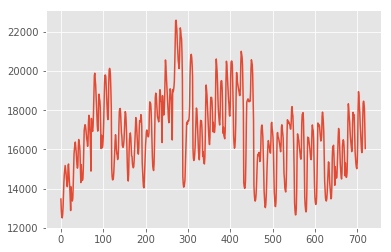

In [9]:
plt.plot(df['value'][:720])

In [10]:
df.isna().sum()

Datetime    0
value       0
dtype: int64

In [11]:
df['time'] = pd.to_datetime(df['Datetime'])
df.drop('Datetime',axis='columns',inplace=True)

df['day_week'] = df['time'].dt.dayofweek
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

In [12]:
df.drop('time',axis='columns',inplace=True)

In [13]:
df.head()

,value,day_week,hour,month,day
0,13478.0,4,1,12,31
1,12865.0,4,2,12,31
2,12577.0,4,3,12,31
3,12517.0,4,4,12,31
4,12670.0,4,5,12,31


In [14]:
df.drop('month',axis='columns',inplace=True)############## get dummies month

In [15]:
df.head()

,value,day_week,hour,day
0,13478.0,4,1,31
1,12865.0,4,2,31
2,12577.0,4,3,31
3,12517.0,4,4,31
4,12670.0,4,5,31


In [16]:
df = pd.get_dummies(df,columns=['day_week','hour','day'])

In [17]:
df.head()

,value,day_week_0,day_week_1,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6,hour_0,hour_1,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,13478.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,12865.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12577.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,12517.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,12670.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
ratio = 0.5

In [19]:
idx_split = int(df.shape[0]*ratio)

In [20]:
train = df.iloc[:idx_split]
test = df.iloc[idx_split:]

In [21]:
train.shape,test.shape

((60636, 63), (60637, 63))

In [22]:
window = pd.DataFrame()

In [23]:
train.head()

,value,day_week_0,day_week_1,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6,hour_0,hour_1,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,13478.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,12865.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,12577.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,12517.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,12670.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
train = df

In [25]:
train['value'].shift(2).head()

0        NaN
1        NaN
2    13478.0
3    12865.0
4    12577.0
Name: value, dtype: float64

In [26]:
train.shape

(121273, 63)

In [27]:
for i in range(24,0,-1):
    window['t-%s' % i] = train['value'].shift(i)

In [28]:
window.shape

(121273, 24)

In [29]:
window.head()

,t-24,t-23,t-22,t-21,t-20,t-19,t-18,t-17,t-16,t-15,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13478.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13478.0,12865.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13478.0,12865.0,12577.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13478.0,12865.0,12577.0,12517.0


In [30]:
window = window.iloc[24:]
train = train.iloc[24:]

In [31]:
window.head()

,t-24,t-23,t-22,t-21,t-20,t-19,t-18,t-17,t-16,t-15,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
24,13478.0,12865.0,12577.0,12517.0,12670.0,13038.0,13692.0,14297.0,14719.0,14941.0,...,14349.0,14107.0,14410.0,15174.0,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0
25,12865.0,12577.0,12517.0,12670.0,13038.0,13692.0,14297.0,14719.0,14941.0,15184.0,...,14107.0,14410.0,15174.0,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0,14097.0
26,12577.0,12517.0,12670.0,13038.0,13692.0,14297.0,14719.0,14941.0,15184.0,15009.0,...,14410.0,15174.0,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0,14097.0,13667.0
27,12517.0,12670.0,13038.0,13692.0,14297.0,14719.0,14941.0,15184.0,15009.0,14808.0,...,15174.0,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0,14097.0,13667.0,13451.0
28,12670.0,13038.0,13692.0,14297.0,14719.0,14941.0,15184.0,15009.0,14808.0,14522.0,...,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0,14097.0,13667.0,13451.0,13379.0


In [32]:
y_train = train['value']

In [33]:
train.drop('value',axis='columns',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
train.shape,window.shape

((121249, 62), (121249, 24))

In [35]:
train = train.join(window)

In [36]:
train.head()

,day_week_0,day_week_1,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6,hour_0,hour_1,hour_2,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
24,0,0,0,1,0,0,0,0,1,0,...,14349.0,14107.0,14410.0,15174.0,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0
25,0,0,0,1,0,0,0,0,0,1,...,14107.0,14410.0,15174.0,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0,14097.0
26,0,0,0,1,0,0,0,0,0,0,...,14410.0,15174.0,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0,14097.0,13667.0
27,0,0,0,1,0,0,0,0,0,0,...,15174.0,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0,14097.0,13667.0,13451.0
28,0,0,0,1,0,0,0,0,0,0,...,15261.0,14774.0,14363.0,14045.0,13478.0,12892.0,14097.0,13667.0,13451.0,13379.0


In [37]:
y_train.head()

24    14097.0
25    13667.0
26    13451.0
27    13379.0
28    13506.0
Name: value, dtype: float64

In [38]:
train.shape,y_train.shape

((121249, 86), (121249,))

In [39]:
test = train.iloc[idx_split:]

In [40]:
train = train.iloc[:idx_split]

In [41]:
y_test = y_train.iloc[idx_split:]

In [42]:
y_train = y_train.iloc[:idx_split]

In [43]:
train.shape,test.shape,y_train.shape,y_test.shape

((60636, 86), (60613, 86), (60636,), (60613,))

In [ ]:
########################### ТАБЛИЧНЫЕ ДАННЫЕ #########################

In [65]:
data = pd.read_csv('data/BlackFriday.csv')

data.drop(['User_ID','Product_ID','Product_Category_3'],axis='columns',inplace=True)

data = data[~data['Product_Category_2'].isna()]

data = data[:360000]

y = data['Purchase']
X = data.drop(['Purchase'],axis='columns')

X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

train,test,y_train,y_test = train_test_split(X,y,test_size=0.5)

train.shape,test.shape,y_train.shape,y_test.shape

((180000, 21), (180000, 21), (180000,), (180000,))

In [ ]:
############################# ТАБЛИЧНЫЕ ДАННЫЕ ###############################

In [66]:
seed = 17

In [67]:
num = 3000

In [68]:
train.shape[0]

180000

In [69]:
division = test.shape[0]//num

In [70]:
division

60

In [71]:
predictions = np.empty((division,test.shape[0]))

In [72]:
predictions.shape

(60, 180000)

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [74]:
train = np.array(train)
y_train = np.array(y_train)
test = np.array(test)
y_test = np.array(y_test)

In [353]:
#n_trees = 30

#models = [DecisionTreeRegressor(),BaggingRegressor(n_estimators=n_trees),
         #RandomForestRegressor(n_estimators=n_trees),GradientBoostingRegressor(n_estimators=n_trees)]

In [163]:
#table_bias = []
#table_var = []

#for model in tqdm_notebook(models):

var_all = []
bias_all = []
n_est = []
var_hist = []
#bias_hist = []

    #var_abs = np.empty((3,60))
    #bias_abs = np.empty((3,60))
    #count = 0
    #for bubu in range(1):

for n_estimators in tqdm_notebook(range(300,301)):
    pred_count = 0

    #n_estimators = 30

    for down in range(0,train.shape[0]-num,num):

        #model = RandomForestRegressor(random_state=seed,
                             #n_estimators=n_estimators)

        model = GradientBoostingRegressor(random_state=seed,
                                 n_estimators=n_estimators)

        #model = AdaBoostRegressor(random_state=seed,
                                 #n_estimators=n_estimators)


        #model = XGBRegressor(random_state=seed,
                   #n_estimators=n_estimators)

        #model = DecisionTreeRegressor(random_state=seed)

        #model = BaggingRegressor(random_state=seed,
                                #n_estimators=n_estimators)

        model.fit(train[down:down+num],y_train[down:down+num])
        pred = model.predict(test)

        #print(model.score(train,y_train))
        #print(model.score(test,y_test))
        predictions[pred_count] = pred

        pred_count = pred_count + 1

    mean_pred = np.mean(predictions,axis=0)
    var = np.mean(np.var(predictions,axis=0))
    
    
    #var_abs[count] = np.abs(predictions[:,56] - mean_pred[56])
    #bias_abs[count] = np.abs(predictions[:,56] - y_test[56])


    bias_sum = []
    for i in range(0,division):
        mse = mean_squared_error(y_test,predictions[i])
        bias_sum.append(mse - var)
        
    bias = np.mean(bias_sum)

    var_hist.append(np.var(predictions,axis=0))
    
    
    var_all.append(var)
    bias_all.append(bias)
    n_est.append(n_estimators)
    #count= count + 1
        
#table_var.append(var_all)
#table_bias.append(bias_all)

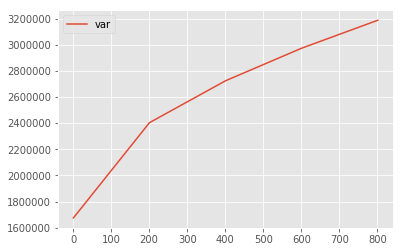

In [145]:
left = 0
right = 5

#plt.plot(n_est[left:right],bias_all[left:right],label='bias')
plt.plot(n_est[left:right],var_all[left:right],label='var')
plt.legend()

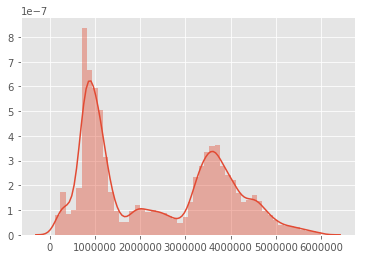

In [179]:
sns.distplot(var_hist[0][var_hist[0]<6000000])

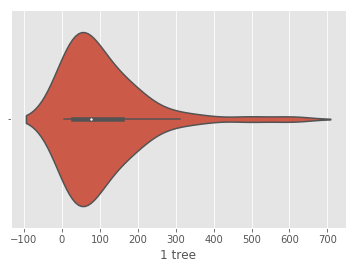

In [325]:
viol = sns.violinplot(var_abs.iloc[:,0])
#viol.set(xlim=(-250,1500))

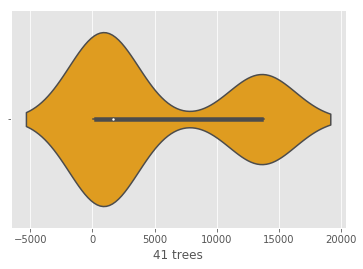

In [329]:
viol = sns.violinplot(bias_abs.iloc[:,2],color='orange')
#viol.set(xlim=(-250,1500))

In [316]:
var_abs = pd.DataFrame(var_abs.reshape(60,3))
var_abs.rename(columns={0:'1 tree',1:'21 trees',2:'41 trees'},inplace=True)

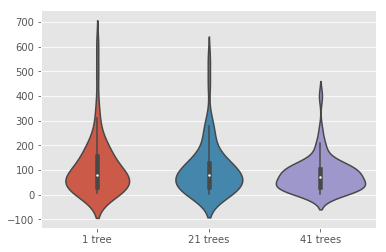

In [317]:
sns.violinplot(data=var_abs)

In [318]:
bias_abs = pd.DataFrame(bias_abs.reshape(60,3))
bias_abs.rename(columns={0:'1 tree',1:'21 trees',2:'41 trees'},inplace=True)

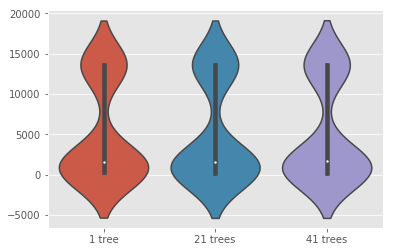

In [319]:
sns.violinplot(data=bias_abs)

In [ ]:
############################ ПРЕДИКШН СРАЗУ НА 5 ЛЕТ #############################

In [177]:
test = df.iloc[idx_split:]

In [178]:
predictions = np.empty((50,test.shape[0]))

In [179]:
test.shape

(60637, 75)

In [180]:
y_test = test['value']

In [181]:
test.drop('value',axis='columns',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [182]:
test.head()

,day_week_0,day_week_1,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6,hour_0,hour_1,hour_2,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
60636,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60637,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60638,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60639,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60640,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
current = train.iloc[-1:]

In [184]:
current

,day_week_0,day_week_1,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6,hour_0,hour_1,hour_2,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
60635,0,0,0,0,0,0,1,0,0,0,...,15309.0,15295.0,15352.0,15383.0,15724.0,15580.0,14583.0,13679.0,11347.0,10986.0


In [185]:
window_test = current.iloc[:,-24:]

In [186]:
feat_test = current.iloc[:,:-24]

In [187]:
window_test.head()

,t-24,t-23,t-22,t-21,t-20,t-19,t-18,t-17,t-16,t-15,...,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
60635,11446.0,11321.0,11423.0,12254.0,13757.0,14499.0,14756.0,14924.0,15180.0,15265.0,...,15309.0,15295.0,15352.0,15383.0,15724.0,15580.0,14583.0,13679.0,11347.0,10986.0


In [188]:
window_test.shape,feat_test.shape

((1, 24), (1, 74))

In [189]:
feat_test.head()

,day_week_0,day_week_1,day_week_2,day_week_3,day_week_4,day_week_5,day_week_6,hour_0,hour_1,hour_2,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
60635,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
test_arr = np.array(test)

In [191]:
np.array(window_test).shape

(1, 24)

In [192]:
np.array(feat_test)

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [193]:
a = np.array(feat_test)

In [194]:
current_arr = np.append(a,window_test).reshape(1,-1)

In [195]:
current_arr.shape

(1, 98)

In [254]:
y_test.head()

60636    10720.0
60637    10693.0
60638    10828.0
60639    11040.0
60640    11516.0
Name: value, dtype: float64

In [230]:
from tqdm import tqdm_notebook

In [247]:
for i in tqdm_notebook(range(test.shape[0])):

    pred = model.predict(current_arr)

    predictions[0][i] = pred

    for j in range(24,1,-1):
        current_arr[:,-j] = current_arr[:,-(j-1)]

    current_arr[:,-1] = pred

    current_arr[:,:-24] = test_arr[i]

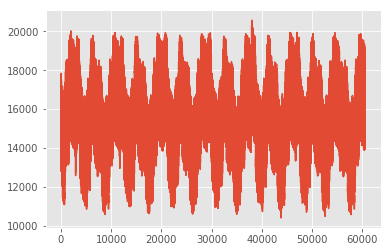

In [248]:
plt.plot(predictions[0])

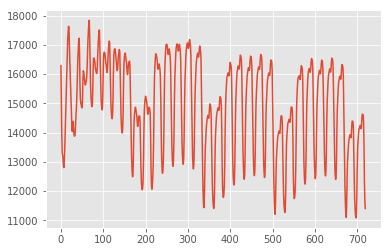

In [249]:
plt.plot(predictions[0][:720])

In [250]:
from sklearn.metrics import r2_score

In [251]:
r2_score(y_test,predictions[0])

0.32370524836949

In [ ]:
################################# ПРЕДИКШН СРАЗУ НА 5 ЛЕТ ###################################333